<a href="https://colab.research.google.com/github/PotlachervuSrilatha/Apache-spark-and-hadoop/blob/main/TASK_2__MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [23]:
import pandas as pd

# Read the CSV file using pandas read_csv
Movies = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')

# Now 'Movies' contains the DataFrame with the data from the CSV file.




In [24]:
Movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


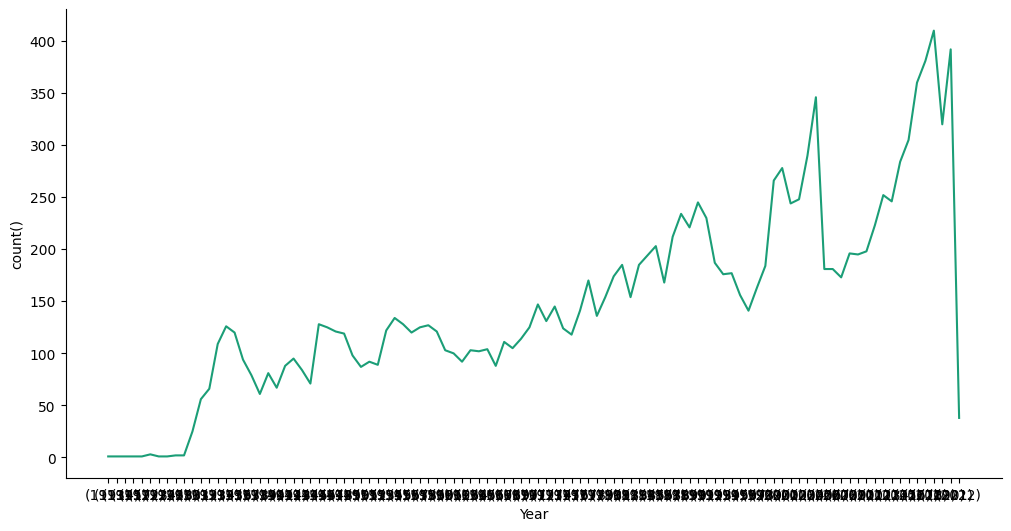

In [25]:
# @title Year vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Movies.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

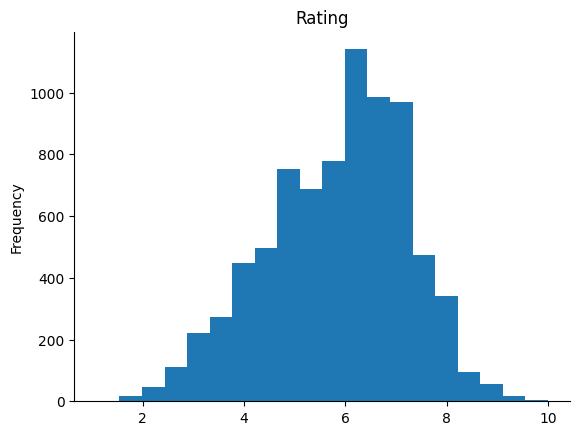

In [26]:
# @title Rating

from matplotlib import pyplot as plt
Movies['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

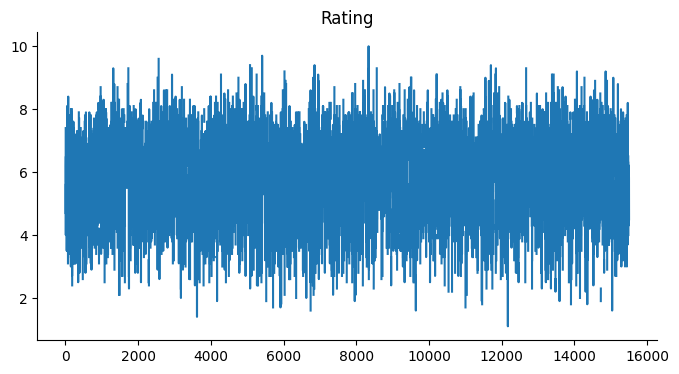

In [27]:
# @title Rating

from matplotlib import pyplot as plt
Movies['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [28]:
# prompt: Using dataframe Movies: after that

Movies[Movies.Year == '(2012)'].sort_values(by = 'Rating', ascending = False)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4902,Gangs of Wasseypur,(2012),321 min,"Action, Comedy, Crime",8.2,"86,355",Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui
10389,Paan Singh Tomar,(2012),135 min,"Action, Biography, Crime",8.2,"34,161",Tigmanshu Dhulia,Irrfan Khan,Mahie Gill,Rajesh Abhay
12804,Shahid,(2012),129 min,"Biography, Drama",8.2,"15,659",Hansal Mehta,Rajkummar Rao,Prabhleen Sandhu,Mohd. Zeeshan Ayyub
7088,Kahaani,(2012),122 min,"Mystery, Thriller",8.1,"59,060",Sujoy Ghosh,Vidya Balan,Parambrata Chattopadhyay,Indraneil Sengupta
1771,Ballad of Rustom,(2012),117 min,Drama,8.1,24,Ajita Suchitra Veera,Ashwath Bhatt,Samiksha Bhatt,Tejaswi Bm
...,...,...,...,...,...,...,...,...,...,...
14171,The Magnetors,(2012),NaN,Animation,NaN,NaN,Rajiv Chilaka,NaN,NaN,NaN
14234,The Saroj Khan Story,(2012),52 min,Documentary,NaN,NaN,Nidhi Tuli,NaN,NaN,NaN
14238,The Serpent King,(2012),NaN,Animation,NaN,NaN,Rajiv Chilaka,NaN,NaN,NaN
14296,The Women in Blue Berets,(2012),48 min,Documentary,NaN,NaN,Farida Pacha,NaN,NaN,NaN


In [29]:
# prompt: Using dataframe Movies: what next

# Explore the dataframe structure
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [30]:
# Get descriptive statistics of numerical columns
Movies.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [31]:
# Find the number of unique values in each categorical column
Movies.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [32]:
# Find the number of missing values in each column
Movies.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [33]:
# Group the data by year and calculate the average rating for each year
Movies.groupby('Year')['Rating'].mean()


Year
(1913)         NaN
(1914)         NaN
(1915)         NaN
(1917)    6.700000
(1922)         NaN
            ...   
(2018)    6.239912
(2019)    6.317671
(2020)    6.282635
(2021)    6.625641
(2022)         NaN
Name: Rating, Length: 102, dtype: float64

<Axes: >

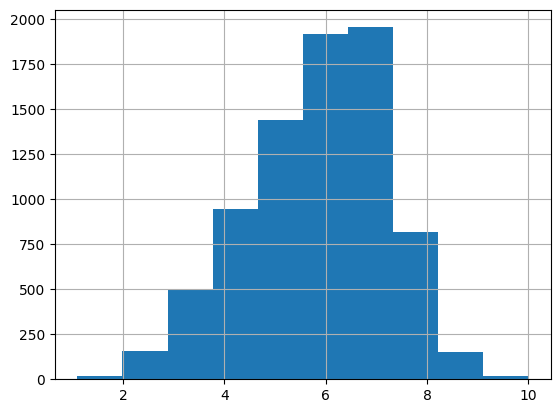

In [34]:
# Plot the distribution of movie ratings
Movies['Rating'].hist()

In [35]:
# Find the top 10 directors with the most movies
Movies['Director'].value_counts().head(10)

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
Nanabhai Bhatt      46
Dhirubhai Desai     46
B.R. Ishara         44
David Dhawan        44
Mohammed Hussain    44
Name: Director, dtype: int64

In [36]:
# 1. What are the top 10 highest-rated movies?
Movies.sort_values(by="Rating", ascending=False).head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),NaN,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
11704,Ram-Path,(2017),NaN,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5125,God of gods,(2019),90 min,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
12673,Secrets of Sinauli,(2021),56 min,"Documentary, History",9.3,"1,373",Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


In [37]:
# 2. How many movies were released in each year?
Movies.groupby("Year").size()

Year
(1913)      1
(1914)      1
(1915)      1
(1917)      1
(1922)      1
         ... 
(2018)    381
(2019)    410
(2020)    320
(2021)    392
(2022)     38
Length: 102, dtype: int64

In [38]:
# 3. What is the average rating for movies in each genre?
Movies.groupby("Genre").mean()["Rating"]

<ipython-input-38-5817bca3e660>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Movies.groupby("Genre").mean()["Rating"]


Genre
Action                          5.092566
Action, Adventure               5.558333
Action, Adventure, Biography    7.800000
Action, Adventure, Comedy       5.610000
Action, Adventure, Crime        5.556250
                                  ...   
Thriller, Action                4.300000
Thriller, Musical, Mystery      7.100000
Thriller, Mystery               6.533333
Thriller, Mystery, Family       6.100000
War                             4.333333
Name: Rating, Length: 485, dtype: float64

In [39]:
# 4. Who are the top 5 directors with the most movies?
Movies.groupby("Director").size().sort_values

<bound method Series.sort_values of Director
A B Arjun          1
A. Bhimsingh      18
A. Habib           1
A. Jagannathan     5
A. Karim           1
                  ..
Zoya Akhtar        7
Zubair Khan        2
Zubeida            2
Zul Vellani        1
Zunaid Memon       1
Length: 5938, dtype: int64>

In [40]:
# Let's explore the Movies dataframe further.

# 1. Check for missing values in each column:

Movies.isnull().sum()



Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [41]:

# 2. Get descriptive statistics of the numerical columns:

Movies.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [42]:
# 3. Find the top 10 movies with the highest rating:

Movies.sort_values(by='Rating', ascending=False).head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),NaN,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
11704,Ram-Path,(2017),NaN,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5125,God of gods,(2019),90 min,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
12673,Secrets of Sinauli,(2021),56 min,"Documentary, History",9.3,"1,373",Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


In [43]:
# 4. Calculate the average rating for each genre:

Movies.groupby('Genre')['Rating'].mean()



Genre
Action                          5.092566
Action, Adventure               5.558333
Action, Adventure, Biography    7.800000
Action, Adventure, Comedy       5.610000
Action, Adventure, Crime        5.556250
                                  ...   
Thriller, Action                4.300000
Thriller, Musical, Mystery      7.100000
Thriller, Mystery               6.533333
Thriller, Mystery, Family       6.100000
War                             4.333333
Name: Rating, Length: 485, dtype: float64